# Bioinformatics Assignment 1

### Phylogenetic Tree Construction by Sequence-Based Distance

# Explain your functions //TODO

#### Reading file

In [8]:
import json
from pprint import pprint

In [9]:
# Read organisms.txt to dictionary.
with open('organisms.txt') as f:
    organisms = json.loads(f.read().replace("'","\""))


In [10]:
# Read blosum file
with open('blosum62_ncbi.txt') as f:
    data = f.read().splitlines()

# Split data with spaces
BLOSUM = {}
all_chars = data[0].split()

# Create empty dict for every character
for char in all_chars:
    BLOSUM[char] = {}

for line in data[1:]:
    # Split each line with space and delete first element
    nums = line.split()[1:]
    temp_dict = {}
    
    # Match all chars with their scores
    for num, char in zip(nums, all_chars):
        temp_dict[char] = int(num)
    
    # Add created dict into blosum matrix
    BLOSUM[line.split()[0]] = temp_dict

# Algorithm implementation

In [11]:
def needleman_wunsch(seq1, seq2):
    '''
    This is the algorithm to find the global allignment in the sequence
    
    Numbers are assigned to indicate the path that will be used in the trace back process.
    Up is -1, Left is 1, Down is 0, Final is 2
    params: 
        seq1: first sequence to be compared
        seq2: second sequence to be compared
    return:
        best_alignment_score_needleman_wunsch: best score of the found alignment
        best_alignment_needleman_wunsch: best global alignments
    '''
    # add star cahr to the beginning of each sequence to make them compatible with blosum matrix
    seq1, seq2 = '*'+seq1, '*'+seq2

    # create two matrix to use in our algorithm. One for alignment scores, one for back tracking
    alignment_matrix = [[None for i in seq2] for j in seq1]
    way_matrix = [[None for i in seq2] for j in seq1]
    
    # first element will be the score of '*' by '*'
    alignment_matrix[0][0] = BLOSUM['*']['*']
    
    # first element of way matrix keeps the value 2 which means we can finish our algorithm when 
    # we found this cell.
    way_matrix[0][0] = 2
    
    # fill the first column with respect to blosum matrix. all the alements of way matrix will 
    # be -1 which means 'left'
    for i in range(1, len(alignment_matrix)):
        alignment_matrix[i][0] = alignment_matrix[i-1][0] + BLOSUM[seq1[i]]['*']
        way_matrix[i][0] = -1
    
    # fill the first row with respect to blosum matrix. all the alements of way matrix will 
    # be 1 which means 'right'
    for j in range(1, len(alignment_matrix[0])):
        alignment_matrix[0][j] = alignment_matrix[0][j-1] + BLOSUM[seq2[j]]['*']
        way_matrix[0][j] = 1
        
    # traverse both matrix
    for i in range(1, len(alignment_matrix)):
        for j in range(1, len(alignment_matrix[0])):
            # calculate 3 scores
            upper_score = alignment_matrix[i-1][j] + BLOSUM[seq1[i]]['*']
            left_score = alignment_matrix[i][j-1] + BLOSUM[seq2[j]]['*']
            diag_score = alignment_matrix[i-1][j-1] + BLOSUM[seq1[i]][seq2[j]]
            
            # max score will be the score of current cell
            cell_score = max(upper_score, left_score, diag_score)
            
            # enter values to way matrix
            if upper_score == cell_score:
                way_matrix[i][j] = -1
            elif left_score == cell_score:
                way_matrix[i][j] = 1
            elif diag_score == cell_score:
                way_matrix[i][j] = 0
            alignment_matrix[i][j] = cell_score

    # calculate best allignments
    best_alignment_needleman_wunsch = construct_alingments(way_matrix, alignment_matrix, seq1, seq2)
    
    # get best alignment score from last element of the matrix
    best_alignment_score_needleman_wunsch = alignment_matrix[len(alignment_matrix)-1][len(alignment_matrix[0])-1]

    return best_alignment_score_needleman_wunsch, best_alignment_needleman_wunsch

def construct_alingments(way_matrix, alignment_matrix, original_seq1, original_seq2):
    '''
    constrcts the allignmets using the created matrix with needleman_wunsch algorithm
    params:
        way_matrix: matrix that hold the path to best alignment
        alignment_matrix: matrix that holds the score values
        original_seq1: first original sequence
        original_seq1: second original sequence
    return:
        new_seq1: first alignment
        new_seq2: second alignment
    '''
    # 'U' is -1, 'L' is 1, 'D' is 0
    
    # new sequences to create
    new_seq1, new_seq2 = '', ''
    
    # variables to be used in list indices
    i = len(original_seq1)-1
    j = len(original_seq2)-1
    while not (i == 0 and j == 0):
        # diagonal means match or mismatch
        if way_matrix[i][j] == 0:
            new_seq1 = original_seq1[i] + new_seq1
            new_seq2 = original_seq2[j] + new_seq2
            i -= 1
            j -= 1
        # left means deletion
        elif way_matrix[i][j] == 1:
            new_seq1 = '*' + new_seq1
            new_seq2 = original_seq2[j] + new_seq2
            j -= 1
        # right means insertion
        elif way_matrix[i][j] == -1:
            new_seq1 = original_seq1[i] + new_seq1
            new_seq2 = '*'+ new_seq2
            i -= 1
    
    # return two sequences that has the best alignments
    return new_seq1, new_seq2

In [12]:
def smith_waterman(seq1, seq2):
    '''
    This is the algorithm to find the local allignment in the sequence
    
    Numbers are assigned to indicate the path that will be used in the trace back process.
    Up is -1, Left is 1, Down is 0, Final is 2
    params: 
        seq1: first sequence to be compared
        seq2: second sequence to be compared
    return:
        best_alignment_score_smith_waterman: best score of the found alignment
        best_alignment_smith_waterman: best local alignments
    '''
    # add star cahr to the beginning of each sequence to make them compatible with blosum matrix
    seq1, seq2 = '*'+seq1, '*'+seq2
    
    # create two matrix to use in our algorithm. One for alignment scores, one for back tracking
    alignment_matrix = [[None for i in seq2] for j in seq1]
    way_matrix = [[None for i in seq2] for j in seq1]

    # first element will be the score of '*' by '*'
    alignment_matrix[0][0] = BLOSUM['*']['*']
    
    # first element of way matrix keeps the value 2 which means we can finish our algorithm when 
    # we found this cell.
    way_matrix[0][0] = 2

    # fill the first column with respect to blosum matrix. all the alements of way matrix will 
    # be -1 which means 'left'
    for i in range(1, len(alignment_matrix)):
        alignment_matrix[i][0] = 0
        way_matrix[i][0] = 2

    # fill the first row with respect to blosum matrix. all the alements of way matrix will 
    # be 1 which means 'right'
    for j in range(1, len(alignment_matrix[0])):
        alignment_matrix[0][j] = 0
        way_matrix[0][j] = 2

    # traverse both matrix
    for i in range(1, len(alignment_matrix)):
        for j in range(1, len(alignment_matrix[0])):
            # calculate 3 scores
            upper_score = alignment_matrix[i-1][j] + BLOSUM[seq1[i]]['*']
            left_score = alignment_matrix[i][j-1] + BLOSUM[seq2[j]]['*']
            diag_score = alignment_matrix[i-1][j-1] + BLOSUM[seq1[i]][seq2[j]]
            
            # max score will be the score of current cell, consider the 0 also
            cell_score = max(upper_score, left_score, diag_score, 0)
            
            # enter values to way matrix
            if upper_score == cell_score:
                way_matrix[i][j] = -1
            elif left_score == cell_score:
                way_matrix[i][j] = 1
            elif diag_score == cell_score:
                way_matrix[i][j] = 0
            elif 0 == cell_score:
                way_matrix[i][j] = 2
                
            alignment_matrix[i][j] = cell_score

    # calculate the allignments
    best_alignment_smith_waterman = get_alignments(way_matrix, alignment_matrix, seq1, seq2)
    
    # get best alignment score from max element of the matrix
    best_alignment_score_smith_waterman = max(map(lambda x: max(x), alignment_matrix))
    
    return best_alignment_score_smith_waterman, best_alignment_smith_waterman

def my_argmax_2d(alignment_matrix):
    '''
    Finds the indices of the element with the higest value in a two dimentional array
    params:
        matrix that will be processed
    return:
        indices of the element with the maximum value
    '''
    return max(map(lambda x: max(x), [[(elem, row_idx, idx) for elem, idx in zip(row,range(len(row)))] for row, row_idx in zip(alignment_matrix, range(len(alignment_matrix)))]))

def get_alignments(way_matrix, alignment_matrix, original_seq1, original_seq2):
    '''
    constrcts the allignmets using the created matrix with smith_waterman algorithm
    params:
        way_matrix: matrix that hold the path to best alignment
        alignment_matrix: matrix that holds the score values
        original_seq1: first original sequence
        original_seq1: second original sequence
    return:
        new_seq1: first alignment
        new_seq2: second alignment
    '''
    # new sequences to create
    new_seq1, new_seq2 = '', ''
    
    # finds the indices of max element
    max_elem = my_argmax_2d(alignment_matrix)
    
    # get the indeces of max element into i and j variable
    i, j = max_elem[1], max_elem[2]
    while way_matrix[i][j] != 2:
        # diagonal means match or mismatch
        if way_matrix[i][j] == 0:
            new_seq1 = original_seq1[i] + new_seq1
            new_seq2 = original_seq2[j] + new_seq2
            i -= 1
            j -= 1
        # left means deletion
        elif way_matrix[i][j] == 1:
            new_seq1 = '*' + new_seq1
            new_seq2 = original_seq2[j] + new_seq2
            j -= 1
        elif way_matrix[i][j] == -1:
            # right means insertion
            new_seq1 = original_seq1[i] + new_seq1
            new_seq2 = '*' + new_seq2
            i -= 1
    
    # return two sequences that has the best alignments
    return new_seq1, new_seq2

# Calculate Score Matrix

In [13]:
def calculate_score_matrix(organisms, algorithm):
    '''
    Calculate score matrix using smith_waterman or needleman_wunsch
    params:
        organisms: organisms to be compared
        algorithm: algorithm to be used. can be either smith_waterman or needleman_wunsch
    return:
        score_matrix: matrix that hold the scores for each sequence pairs
    '''
    # get all sequences
    all_seqs = [elem[1] for elem in list(organisms.values())]
    
    # create an empty score matrix
    score_matrix = [[None for i in all_seqs] for j in all_seqs]
    
    # traverse the score matrix
    for idx1, seq1 in enumerate(all_seqs):
        for idx2, seq2 in enumerate(all_seqs):
            # call the algorithm to be used
            if algorithm == 'NW':
                score_matrix[idx1][idx2] = needleman_wunsch(seq1, seq2)[0]
            else:
                score_matrix[idx1][idx2] = smith_waterman(seq1, seq2)[0]
        
    return score_matrix

# Calculate Distance Matrix

In [14]:
def calculate_distance_matrix(score_matrix, organisms, algorithm):
    '''
    Calculate the distances between organism pairs
    params:
        score_matrix: matrix that keeps the score for each sequence pairs
    return:
        distance_matrix: matrix that keeps the distances for all sequences
    '''
    # max elements in each row
    maxs = list(map(lambda x: sorted(x, reverse=True)[1], score_matrix))
    
    # traverse the score matrix
    for i, row in enumerate(score_matrix):
        for j, elem in enumerate(row):
            # subtract the max of each row from each element of the row
            score_matrix[i][j] -= maxs[i]
    
    distance_matrix = score_matrix
    
    return distance_matrix

# Generate Phylogenetic Tree

In [23]:
from scipy.cluster.hierarchy import linkage, dendrogram
import pylab

def generate_phylogenetic_tree(organisms, distance_matrix, algorithm):    
    average = linkage(distance_matrix, "average")
    keys = [elem[0] for elem in organisms.values()]
    dendrogram(average, labels=keys, orientation="left", leaf_font_size=10)
    pylab.subplots_adjust(bottom=0.1, left=0.2, right=1.0, top=1.0)
    # pylab.savefig("YourNameSurname" + algorithm +".jpg", )
    # Save figure as pylab.savefig("YourNameSurname" + algorithm +".jpg")
    # Show figure

# Function Calls

# NEEDLEMAN WUNSCH

In [19]:
algorithm = 'NW'
seq1 = organisms['EF153719.1'][1] # Turkey organism
seq2 = organisms['KM096864.1'][1] # Chicken organism

# Functions tests
best_alignment_score_needleman_wunsch, best_alignment_needleman_wunsch = needleman_wunsch(seq1, seq2)

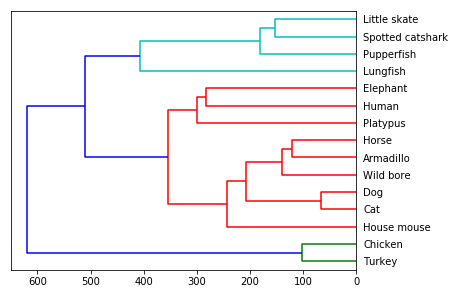

In [20]:
# Phylogenetic tree test
score_matrix = calculate_score_matrix(organisms, algorithm)
distance_matrix = calculate_distance_matrix(score_matrix, organisms, algorithm)
generate_phylogenetic_tree(organisms, distance_matrix, algorithm)

# SMITH WATER

In [21]:
algorithm = 'SW'
seq1 = organisms['EF153719.1'][1] # Turkey organism
seq2 = organisms['KM096864.1'][1] # Chicken organism

# Functions tests
best_alignment_score_smith_waterman, best_alignment_smith_waterman = smith_waterman(seq1, seq2)

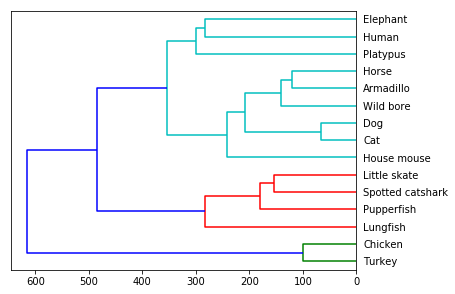

In [22]:
# Phylogenetic tree test
score_matrix = calculate_score_matrix(organisms, algorithm)
distance_matrix = calculate_distance_matrix(score_matrix, organisms, algorithm)
generate_phylogenetic_tree(organisms, distance_matrix, algorithm)

# Evaluation of the outputs // TODO

7. Comment on the results of two output images.

Notes: 
1. Your are not allowed to use Numpy.
2. You are not allowed to use any libraries to find the Needleman Wunsch and Smith Waterman scores.
3. You can only use standard libraries apart from the given codes.
4. Please submit your assignment using Moodle. Upload a single zip file named as YourNameSurname.zip. Your zip file should include your report, your source code, and the corresponding read.me file. You can use any programming language of your choice. But, your read.me file should clearly explain how to run your program.
5. For any question e-mail me from selen.parlar@boun.edu.tr